In [40]:
import pandas as pd
import numpy as np
import requests
import json
import os
from matplotlib import pyplot as plt
from scipy.stats import linregress
from config import username, api_key
from city_list import slist, clist, alist

In [41]:
city_path = os.path.join("Data","combined_data_residential.csv")
df = pd.read_csv(city_path)
df

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
0,Birmingham,AL,143.647642,50.020103,400.595034,96.557022,25.618049,NaN,143.311563,21.116271,1933,2770,62.78,22.46,73.94,51.44,5712,8
1,Mobile,AL,107.084979,50.998702,315.907443,117.940363,10.227344,NaN,120.403278,30.169515,2537,1656,67.46,18.68,76.64,58.10,6528,2
2,Anchorage,AK,133.111653,55.616592,270.506011,86.474614,66.884246,NaN,90.755170,13.434063,3,10201,37.04,14.00,44.06,30.02,1667,821
3,Phoenix,AZ,66.839636,34.146045,200.353735,95.292175,4.228576,5.881798,76.588709,26.895603,3741,1359,71.42,34.34,88.70,54.32,876,0
4,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0
5,Tucson,AZ,111.380086,32.412979,331.288908,84.472751,8.777518,9.298245,119.370537,24.753733,1946,2486,63.50,37.22,82.04,44.96,1390,23
6,Yuma,AZ,89.963936,43.328682,275.588443,129.802519,2.726742,3.322212,139.602654,40.368228,3811,1129,72.32,29.84,87.26,57.38,368,0
7,Little Rock,AR,124.150876,61.015530,334.467534,139.299537,26.681641,25.018769,110.742169,36.937149,2170,3006,62.78,18.68,71.96,53.24,5468,44
8,Fayetteville,AR,136.078645,35.155192,364.645346,88.438439,31.320575,11.478266,115.174324,23.263998,1517,4013,58.28,20.84,68.54,47.66,4553,43
9,Conway,AR,113.451620,38.979745,312.372626,122.396399,22.037656,0.037681,94.732085,38.123944,1843,3472,60.44,22.82,71.96,49.10,4908,41


In [42]:
df2 = df[(df["CDD"] >= 0) & (df["HDD"] >= 0)]
df2

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
0,Birmingham,AL,143.647642,50.020103,400.595034,96.557022,25.618049,NaN,143.311563,21.116271,1933,2770,62.78,22.46,73.94,51.44,5712,8
1,Mobile,AL,107.084979,50.998702,315.907443,117.940363,10.227344,NaN,120.403278,30.169515,2537,1656,67.46,18.68,76.64,58.10,6528,2
2,Anchorage,AK,133.111653,55.616592,270.506011,86.474614,66.884246,NaN,90.755170,13.434063,3,10201,37.04,14.00,44.06,30.02,1667,821
3,Phoenix,AZ,66.839636,34.146045,200.353735,95.292175,4.228576,5.881798,76.588709,26.895603,3741,1359,71.42,34.34,88.70,54.32,876,0
4,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0
5,Tucson,AZ,111.380086,32.412979,331.288908,84.472751,8.777518,9.298245,119.370537,24.753733,1946,2486,63.50,37.22,82.04,44.96,1390,23
6,Yuma,AZ,89.963936,43.328682,275.588443,129.802519,2.726742,3.322212,139.602654,40.368228,3811,1129,72.32,29.84,87.26,57.38,368,0
7,Little Rock,AR,124.150876,61.015530,334.467534,139.299537,26.681641,25.018769,110.742169,36.937149,2170,3006,62.78,18.68,71.96,53.24,5468,44
8,Fayetteville,AR,136.078645,35.155192,364.645346,88.438439,31.320575,11.478266,115.174324,23.263998,1517,4013,58.28,20.84,68.54,47.66,4553,43
9,Conway,AR,113.451620,38.979745,312.372626,122.396399,22.037656,0.037681,94.732085,38.123944,1843,3472,60.44,22.82,71.96,49.10,4908,41


In [50]:
df3 = df2.sort_values(by=['mean site eui res']).drop_duplicates(subset ="city", keep = "last").head(10)
df3

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
95,Providence,RI,80.200232,10.407229,180.004535,23.296991,32.086360,7.838448,48.765857,5.993155,616,6115,49.82,20.84,60.26,39.56,5142,362
60,Grand Rapids,MI,144.670436,11.963471,321.893042,36.327885,65.543044,0.549136,83.728203,11.371527,698,6485,49.10,17.78,57.92,40.28,3875,626
35,Honolulu,HI,58.847680,20.101995,175.626742,57.860299,4.678788,2.516491,88.296732,17.574633,3954,1,75.74,16.34,84.02,67.64,5869,0
118,Green Bay,WI,92.159108,22.648930,222.376025,47.659936,30.730914,23.629515,59.517960,10.534924,358,7885,44.42,18.50,53.60,35.06,3127,514
52,Hagerstown,MD,111.022886,26.094388,295.447560,76.567008,24.815488,4.600349,88.672356,18.535477,789,5326,52.52,19.58,62.24,42.80,4727,326
10,Los Angeles,CA,81.087951,27.359427,220.286297,54.786719,16.832243,14.489057,87.060861,12.482543,1638,880,67.10,22.64,78.44,55.76,2297,0
18,Hartford,CT,78.551224,29.069842,167.277800,57.736001,34.538848,23.319241,43.771088,13.409215,603,6318,49.28,21.92,60.26,38.48,5344,313
49,Portland,OR,89.064103,30.306801,218.356452,71.989303,28.768261,12.312756,62.548614,14.519812,330,4447,53.78,21.20,64.22,43.16,4058,9
4,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0
23,Jacksonville,FL,126.601510,30.561054,348.638448,93.480665,24.293234,1.384216,122.866205,29.627217,2803,1215,69.26,16.34,77.54,61.16,4881,-7777


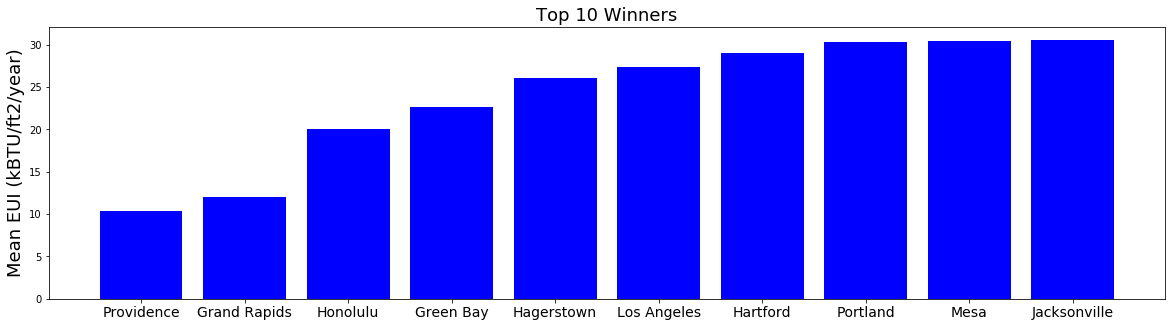

In [51]:
x = df3["city"]
y = df3["mean site eui res"]
x_axis = np.arange(len(y))
plt.figure(figsize=(20,5))
plt.bar(x_axis, y, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, fontsize=14)
plt.title("Top 10 Winners",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","bottomfive.png"))
plt.show()

In [52]:
df4 = df2.sort_values(by=['mean site eui res'],ascending=False).drop_duplicates(subset ="city", keep = "last").head(10)
df4

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
43,Wichita,KS,150.958321,290.193758,394.396547,345.147943,39.060595,270.714636,119.616527,19.743662,1573,4650,56.66,23.18,68.18,44.96,3596,129
61,Flint,MI,150.013081,187.868607,331.143547,221.664247,67.681165,176.192908,89.669388,11.675698,493,6958,47.30,21.74,58.28,36.32,3167,286
79,Farmington,NM,98.180182,160.009868,236.679333,210.347521,34.953174,128.573013,65.677722,19.521386,741,5405,52.16,31.46,67.82,36.50,1089,141
86,Dayton,OH,88.156151,123.463910,212.330880,171.883824,29.833271,103.250169,58.747611,24.377188,1264,5247,54.14,19.04,63.68,44.60,4033,123
36,Chicago,IL,110.227205,99.306785,248.333603,148.312615,35.183959,84.345105,95.521829,17.829644,649,6929,47.84,18.14,56.84,38.66,3817,349
84,Cleveland,OH,123.268573,97.066017,279.244786,164.650707,61.561624,77.427767,71.463075,28.623771,949,5438,52.70,13.28,59.36,46.04,3635,681
80,New York,NY,104.749925,84.280973,241.498986,140.034878,25.703316,50.987036,139.138762,26.628080,796,5701,51.44,21.02,62.06,41.18,5004,262
59,Detroit,MI,101.238326,75.882676,225.442830,107.996197,39.132406,62.231961,59.511679,13.549946,731,6335,49.64,18.32,58.82,40.46,3756,573
53,Boston,MA,102.600172,75.292715,223.830556,122.002931,47.422305,54.639441,59.353986,20.503156,561,6392,48.92,20.48,59.18,38.84,4882,554
68,Kansas City,MO,81.966664,72.319912,213.398442,124.258375,20.132998,48.584940,61.621750,23.070083,1201,5309,53.78,22.46,64.94,42.44,4073,171


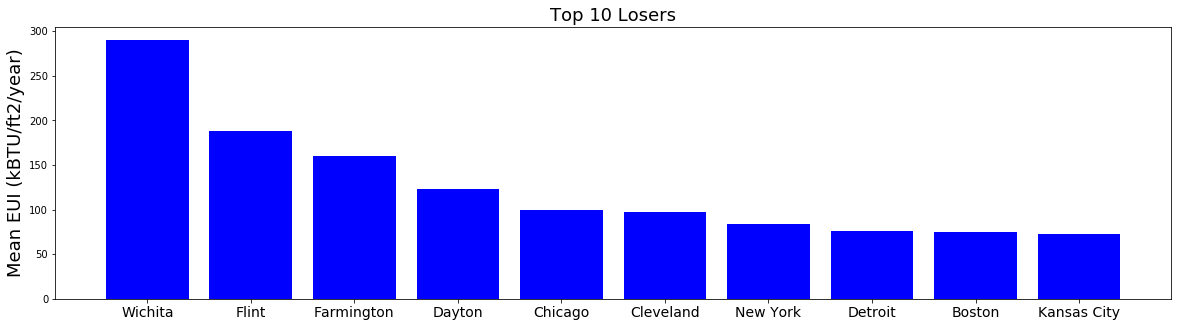

In [7]:
x = df4["city"]
y = df4["mean site eui res"]
x_axis = np.arange(len(y))
plt.figure(figsize=(20,5))
plt.bar(x_axis, y, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, fontsize=14)
plt.title("Top 10 Losers",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","topfive.png"))
plt.show()

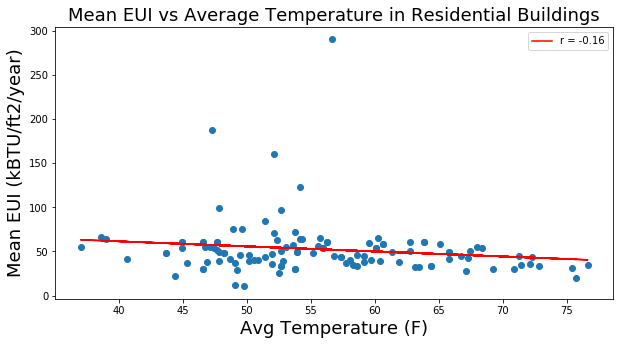

Slope = -0.5720854675098136
r = -0.15565668563476007


In [25]:
x = df2["Tavg"]
y = df2["mean site eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Average Temperature in Residential Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Avg Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","Tavg.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")


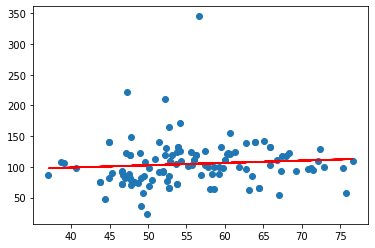

Slope = 0.37767786617961946
r = 0.08668963240990166


In [9]:
x = df2["Tavg"]
y = df2["mean source eui res"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotsres","Tavgsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")


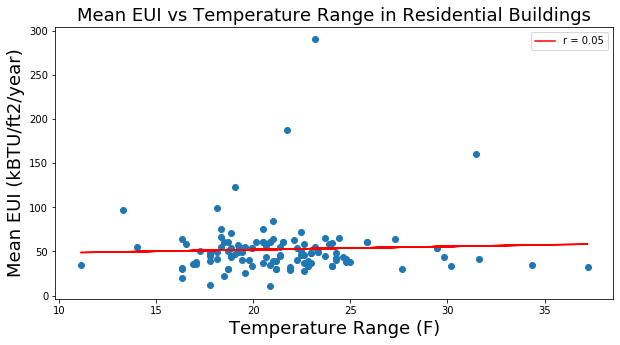

Slope = 0.3628170096645292
r = 0.04537675038197021


In [26]:
x = df2["Trange"]
y = df2["mean site eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Temperature Range in Residential Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Temperature Range (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","Trange.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

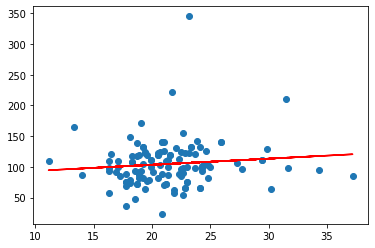

Slope = 0.9947299509910498
r = 0.10495175628636878


In [11]:
x = df2["Trange"]
y = df2["mean source eui res"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotsres","Trangesource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

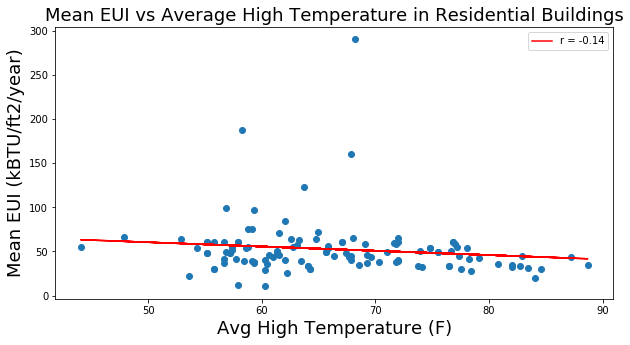

Slope = -0.48331489892784746
r = -0.13804362870944345


In [27]:
x = df2["Tmax"]
y = df2["mean site eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Average High Temperature in Residential Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Avg High Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","Tmax.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

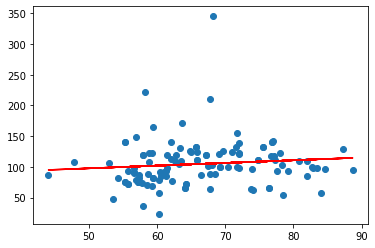

Slope = 0.43795186623017285
r = 0.10552402049614173


In [13]:
x = df2["Tmax"]
y = df2["mean source eui res"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotsres","Tmaxsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

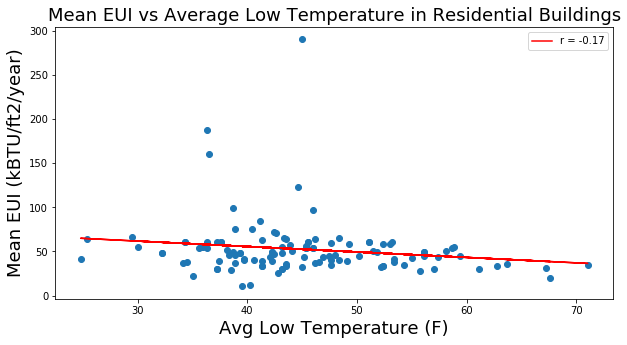

Slope = -0.615827474032118
r = -0.1676934256593865


In [28]:
x = df2["Tmin"]
y = df2["mean site eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs Average Low Temperature in Residential Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Avg Low Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","Tmin.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

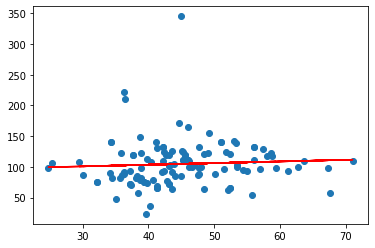

Slope = 0.26521093390765915
r = 0.060923825524040146


In [15]:
x = df2["Tmin"]
y = df2["mean source eui res"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotsres","Tminsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

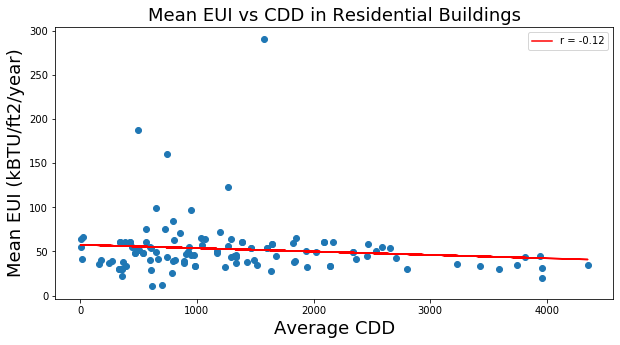

Slope = -0.003830132153364274
r = -0.11853644382792657


In [33]:
x = df2["CDD"]
y = df2["mean site eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs CDD in Residential Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average CDD",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","CDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

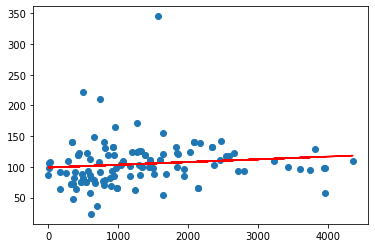

Slope = 0.00444731446026419
r = 0.11611136699357551


In [17]:
x = df2["CDD"]
y = df2["mean source eui res"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotsres","CDDsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

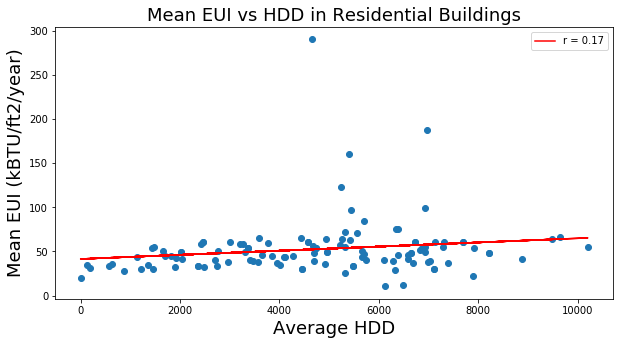

Slope = 0.002341408309774578
r = 0.16673556400375503


In [34]:
x = df2["HDD"]
y = df2["mean site eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean EUI vs HDD in Residential Buildings",fontsize=18)
plt.ylabel("Mean EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average HDD",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","HDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

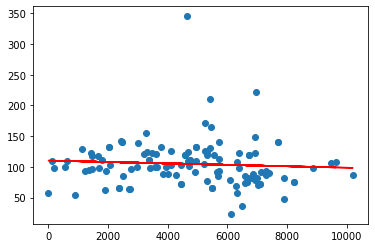

Slope = -0.0011591312585147652
r = -0.06963418063426856


In [19]:
x = df2["HDD"]
y = df2["mean source eui res"]

plt.scatter(x,y)

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

plt.savefig(os.path.join("Data","plotsres","HDDsource.png"))
plt.show()
print(f"Slope = {m}")
r = stats.rvalue
print(f"r = {r}")

In [20]:
df3 = df2.dropna(axis=0,subset=["mean fuel eui res"])

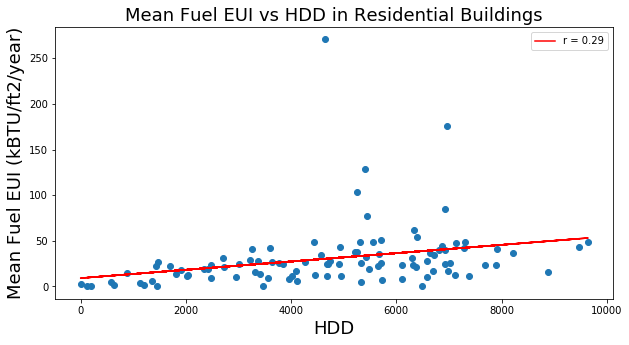

Slope = 0.0045590379702797204
r = 0.2893975917255551


In [36]:
x = df3["HDD"]
y = df3["mean fuel eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])

plt.ylabel("Mean Fuel EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("HDD",fontsize=18)
plt.title("Mean Fuel EUI vs HDD in Residential Buildings",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","FuelHDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

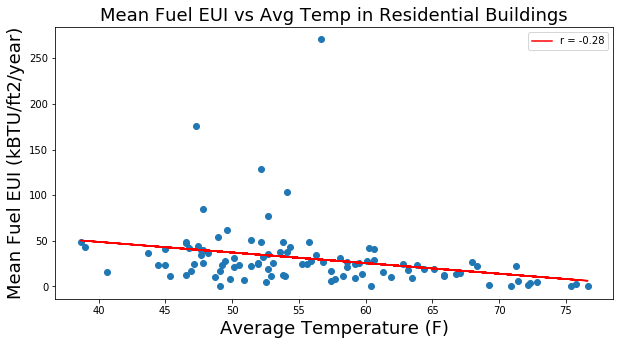

Slope = -1.162617387181474
r = -0.2845631968286475


In [37]:
x = df3["Tavg"]
y = df3["mean fuel eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean Fuel EUI vs Avg Temp in Residential Buildings",fontsize=18)
plt.ylabel("Mean Fuel EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","TavgFuel.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

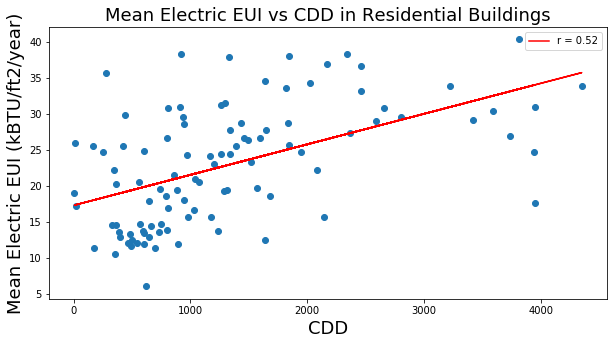

Slope = 0.004245014535205881
r = 0.5232601942002019


In [38]:
x = df3["CDD"]
y = df3["mean electric eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean Electric EUI vs CDD in Residential Buildings",fontsize=18)
plt.ylabel("Mean Electric EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("CDD",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","ElecCDD.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")

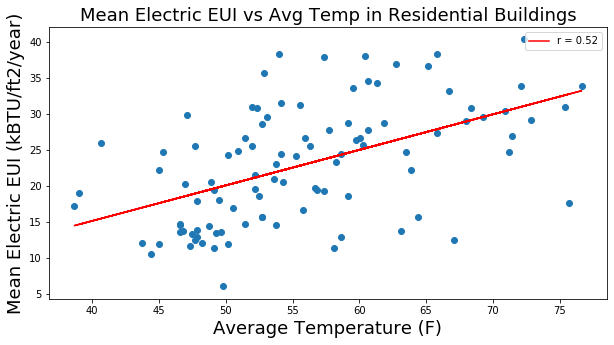

Slope = 0.49435424996875615
r = 0.5220180967226256


In [39]:
x = df3["Tavg"]
y = df3["mean electric eui res"]

plt.figure(figsize=(10,5))
plt.scatter(x,y)
stats = linregress(x, y)


m = stats.slope
b = stats.intercept

r = stats.rvalue
plt.plot(x, m * x + b, color="red") 

plt.legend([f"r = {round(r,2)}"])
plt.title("Mean Electric EUI vs Avg Temp in Residential Buildings",fontsize=18)
plt.ylabel("Mean Electric EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Average Temperature (F)",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","TavgElec.png"))
plt.show()
print(f"Slope = {m}")

print(f"r = {r}")